# Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import altair as alt
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Data Preprocessing

In [2]:
#Loading the dataset
df = pd.read_csv("ElectricCarData_Clean.csv")
df = df.replace(r'^\s*$', np.nan, regex=True)
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 103


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [4]:
df['Brand'].unique()

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [5]:
df['Model'].unique()

array(['Model 3 Long Range Dual Motor', 'ID.3 Pure', '2', 'iX3 ', 'e ',
       'Air ', 'e-Golf ', 'e-208 ', 'Model 3 Standard Range Plus',
       'Q4 e-tron ', 'EQC 400 4MATIC', 'Leaf ', 'Kona Electric 64 kWh',
       'i4 ', 'IONIQ Electric', 'ID.3 Pro S', 'Taycan Turbo S', 'e-Up! ',
       'ZS EV', 'Cooper SE ', 'Corsa-e ', 'Model Y Long Range Dual Motor',
       'Enyaq iV 50', 'e-tron GT ', 'Model 3 Long Range Performance',
       'ID.4 ', 'ID.3 Pro', 'XC40 P8 AWD Recharge', 'i3 120 Ah',
       'e-2008 SUV ', 'e-tron 50 quattro', 'e-Niro 64 kWh',
       'Zoe ZE50 R110', 'Cybertruck Tri Motor', 'MX-30 ', 'Leaf e+',
       'UX 300e', 'el-Born ', 'Zoe ZE50 R135', 'EQA ',
       'Model S Long Range', 'Kona Electric 39 kWh',
       'e-tron Sportback 55 quattro', 'CITIGOe iV ', 'Mii Electric ',
       'e-Soul 64 kWh', 'Ampera-e ', 'Taycan 4S', 'One ', 'U5 ',
       'e-tron 55 quattro', 'Roadster ', 'Mokka-e ', 'Enyaq iV 80',
       'Model X Long Range', 'e Advance', '3 Crossback E-Tense',


In [6]:
df['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [7]:
df['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [8]:
df['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [9]:
df['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

# Data Visualization

In [11]:
def altair_dist(df, colname):
    name = ' '.join(re.findall('[A-Z][^A-Z]*', colname))
    hist = alt.Chart(df).mark_bar().encode(
        x=alt.X(
            shorthand=colname, 
            bin=alt.Bin(maxbins=20), 
            title=f"{name} (binned)"
        ),
        y=alt.Y(
            shorthand='count()', 
            title='Number of Electric Cars'
        )
    ).properties(title=f'Histogram of {name}',width=200,
    height=200)
    box = alt.Chart(df).mark_boxplot().encode(
        x=alt.X(
            shorthand=colname,
            title=name
        ),
    ).properties(title=f'Boxplot of {name}')

    return hist & box

In [12]:
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 
           'Efficiency_WhKm','FastCharge_KmH', 'PriceEuro']

(altair_dist(df, features[0]) | altair_dist(df, features[1])) &\
(altair_dist(df, features[2]) | altair_dist(df, features[3])) &\
(altair_dist(df, features[4]) | altair_dist(df, features[5])) 

alt.VConcatChart(...)

In [13]:
brush = alt.selection(type='interval', resolve='global')

# common base for all subplots
base = alt.Chart(df).mark_point().encode(
    y=alt.Y('PriceEuro', title='Price'),
    color=alt.condition(
        brush, 
        'BodyStyle', 
        alt.ColorValue('black'), 
        legend=alt.Legend(orient="top"), 
        scale=alt.Scale(scheme='set1'),
    )
).add_selection(
    brush
).properties(
    width=300,
    height=200
)

x1 = alt.X('AccelSec', title='Acceleration_in_sec')
x2 = alt.X('TopSpeed_KmH', title='TopSpeed_in_km/hr')
x3 = alt.X('Range_Km', title='Range_in_km')
x4 = alt.X('Efficiency_WhKm', title='Efficiency_in_Wh/km')
x5 = alt.X('FastCharge_KmH', title='FastChargeSpeed_kmper_hr')

# layout for subplots
(base.encode(x=x1) | base.encode(x=x2)) &\
(base.encode(x=x3) | base.encode(x=x4)) &\
(base.encode(x=x5))

alt.VConcatChart(...)

In [14]:
base = alt.Chart(df).mark_boxplot().encode(
    y=alt.Y('PriceEuro', title='Price'), 
    color=alt.Color(
        shorthand='BodyStyle', 
        scale=alt.Scale(scheme='set1'),
        legend=alt.Legend(orient="top"),
    )
).properties(
    width=200, 
    height=200
)

x1 = alt.X('RapidCharge') 
x2 = alt.X('PowerTrain')
x3 = alt.X('PlugType')
x4 = alt.X('Seats')
x5 = alt.X('BodyStyle')
x6 = alt.X('Segment')
title1 = 'Distribution of Price across RapidCharge and BodyStyle'
title2 = 'Distribution of Price across PowerTrain and BodyStyle'
title3 = 'Distribution of Price across PlugType and BodyStyle'
title4 = 'Distribution of Price across Seats and BodyStyle'
title5 = 'Distribution of Price across Segment and BodyStyle'
title6 = 'Distribution of Price across BodyStyle'

base.encode(x=x1).properties(title=title1) | base.encode(x=x2).properties(title=title2) &\
base.encode(x=x3).properties(title=title3) | base.encode(x=x4).properties(title=title4)&\
base.encode(x=x5).properties(title=title5) | base.encode(x=x6).properties(title=title6)   


alt.HConcatChart(...)

# Label Encoding and Normalization

In [15]:
df['PowerTrain']= df['PowerTrain'].str.replace('AWD','1')
df['PowerTrain']= df['PowerTrain'].str.replace('FWD','2')
df['PowerTrain']= df['PowerTrain'].str.replace('RWD','3')

In [16]:
df['BodyStyle']= df['BodyStyle'].str.replace('Sedan','1')
df['BodyStyle']= df['BodyStyle'].str.replace('Hatchback','2')
df['BodyStyle']= df['BodyStyle'].str.replace('Liftback','3')
df['BodyStyle']= df['BodyStyle'].str.replace('SUV','4')
df['BodyStyle']= df['BodyStyle'].str.replace('Pickup','5')
df['BodyStyle']= df['BodyStyle'].str.replace('MPV','6')
df['BodyStyle']= df['BodyStyle'].str.replace('Cabrio','7')
df['BodyStyle']= df['BodyStyle'].str.replace('SPV','8')
df['BodyStyle']= df['BodyStyle'].str.replace('Station','9')

In [17]:
df['PlugType']= df['PlugType'].str.replace('Type 2 CCS','1')
df['PlugType']= df['PlugType'].str.replace('Type 2 CHAdeMO','2')
df['PlugType']= df['PlugType'].str.replace('Type 1 CHAdeMO','3')
df['PlugType']= df['PlugType'].str.replace('Type 2','4')

In [18]:
df['RapidCharge']= df['RapidCharge'].str.replace('No','2')
df['RapidCharge']= df['RapidCharge'].str.replace('Yes','1')

In [19]:
df['Segment']= df['Segment'].str.replace('D','1')
df['Segment']= df['Segment'].str.replace('C','2')
df['Segment']= df['Segment'].str.replace('B','3')
df['Segment']= df['Segment'].str.replace('F','4')
df['Segment']= df['Segment'].str.replace('A','5')
df['Segment']= df['Segment'].str.replace('E','6')
df['Segment']= df['Segment'].str.replace('N','7')
df['Segment']= df['Segment'].str.replace('S','8')

In [20]:
df1=df.drop(['Brand','Model'],axis=1)

In [21]:
df1.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,1,1,1,1,1,5,55480
1,10.0,160,270,167,250,1,3,1,2,2,5,30000
2,4.7,210,400,181,620,1,1,1,3,1,5,56440
3,6.8,180,360,206,560,1,3,1,4,1,5,68040
4,9.5,145,170,168,190,1,3,1,2,3,4,32997


In [22]:
df1.isnull().sum()

AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccelSec         103 non-null    float64
 1   TopSpeed_KmH     103 non-null    int64  
 2   Range_Km         103 non-null    int64  
 3   Efficiency_WhKm  103 non-null    int64  
 4   FastCharge_KmH   103 non-null    int64  
 5   RapidCharge      103 non-null    object 
 6   PowerTrain       103 non-null    object 
 7   PlugType         103 non-null    object 
 8   BodyStyle        103 non-null    object 
 9   Segment          103 non-null    object 
 10  Seats            103 non-null    int64  
 11  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 9.8+ KB


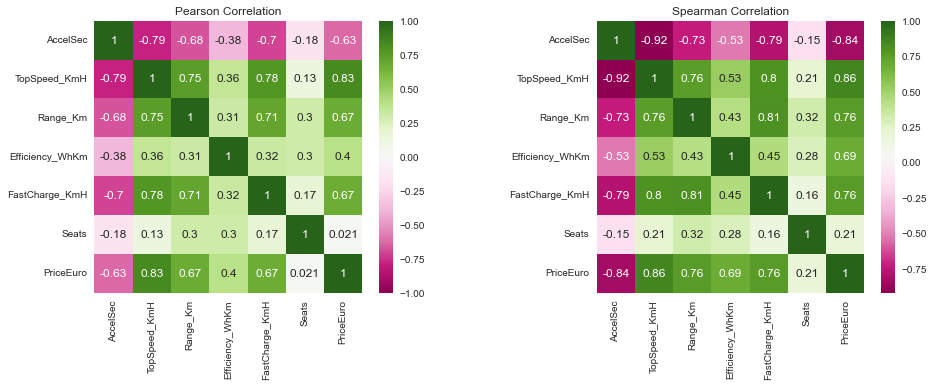

In [24]:
#correlation matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(
    data=df1.corr(method='pearson'), 
    vmin=-1, vmax=1, 
    annot=True, cmap='PiYG', 
    ax=ax[0]
)
sns.heatmap(
    data=df1.corr(method='spearman'), 
     
    annot=True, cmap='PiYG', 
    ax=ax[1]
)

ax[0].set_title('Pearson Correlation')
ax[1].set_title('Spearman Correlation')
plt.show()

In [25]:
#Get list of categorical variables
s = (df1.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']


In [26]:
df1.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,1,1,1,1,1,5,55480
1,10.0,160,270,167,250,1,3,1,2,2,5,30000
2,4.7,210,400,181,620,1,1,1,3,1,5,56440
3,6.8,180,360,206,560,1,3,1,4,1,5,68040
4,9.5,145,170,168,190,1,3,1,2,3,4,32997


In [27]:
for i in df1:
    print(i)

AccelSec
TopSpeed_KmH
Range_Km
Efficiency_WhKm
FastCharge_KmH
RapidCharge
PowerTrain
PlugType
BodyStyle
Segment
Seats
PriceEuro


In [28]:
#Creating a copy of data
ds = df1.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AccelSec',
'TopSpeed_KmH',
'Range_Km',
'Efficiency_WhKm',
'FastCharge_KmH',
'RapidCharge',
'PowerTrain',
'PlugType',
'BodyStyle',
'Segment',
'Seats',
'PriceEuro']
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [29]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,-0.931186,1.240881,0.886862,-0.957247,2.466839,-0.225877,-1.075633,-0.35688,-1.406354,-1.243698,0.147109,-0.009761
1,0.867167,-0.442660,-0.548531,-0.753325,-0.988389,-0.225877,1.471268,-0.35688,-0.805298,-0.689149,0.147109,-0.759866
2,-0.897883,0.710450,0.488142,-0.277506,0.864415,-0.225877,-1.075633,-0.35688,-0.204242,-1.243698,0.147109,0.018501
3,-0.198524,0.018584,0.169166,0.572171,0.563960,-0.225877,1.471268,-0.35688,0.396814,-1.243698,0.147109,0.359993
4,0.700653,-0.788593,-1.345971,-0.719338,-1.288843,-0.225877,1.471268,-0.35688,-0.805298,-0.134599,-1.115578,-0.671638


# PCA

In [30]:
#code for getting explained_variance_ratio
dim=[]
var=[]
for i in range(1,8):
    pca = PCA(n_components=i)
    pca.fit(scaled_ds)
    var.append(pca.explained_variance_ratio_)
    dim.append(i)
var_new=var[6]

In [31]:
var_new

array([0.40122635, 0.1846254 , 0.12848737, 0.07361133, 0.05305538,
       0.04575689, 0.03661641])

Text(0, 0.5, 'cumulative explained variance')

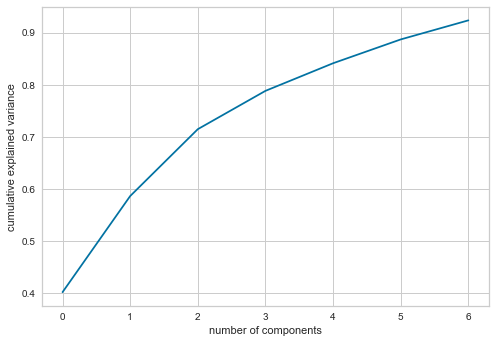

In [32]:
# b. Plotting explained_variance_ratio with dimension
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [33]:
#Initiating PCA to reduce dimentions aka features to 6
pca = PCA(n_components=6)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3",'col4','col5','col6']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,103.0,-8.623091e-18,2.204976,-4.980359,-1.606901,-0.371844,1.414459,8.096311
col2,103.0,-1.552156e-16,1.495736,-2.152031,-0.908536,-0.509861,0.661382,6.298594
col3,103.0,-4.958278e-17,1.247784,-4.273578,-0.703794,-0.320975,0.384521,4.357692
col4,103.0,-4.527123e-17,0.944455,-1.552081,-0.751337,0.062732,0.312298,3.142968
col5,103.0,-2.586927e-17,0.801814,-1.199757,-0.579349,-0.188168,0.420039,3.428489
col6,103.0,6.898473e-17,0.744625,-2.586691,-0.477220,0.040280,0.482366,2.648780


In [34]:
import matplotlib as mpl
cmap = mpl.colormaps['viridis']

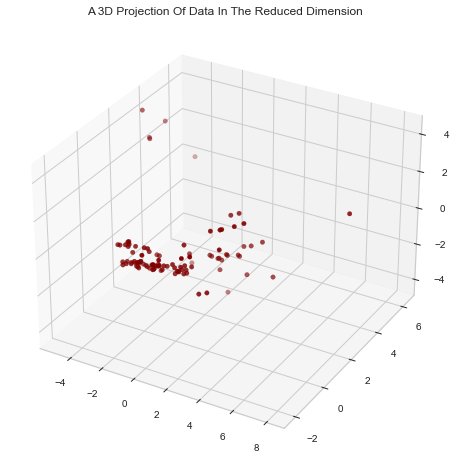

In [35]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o", cmap=cmap )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


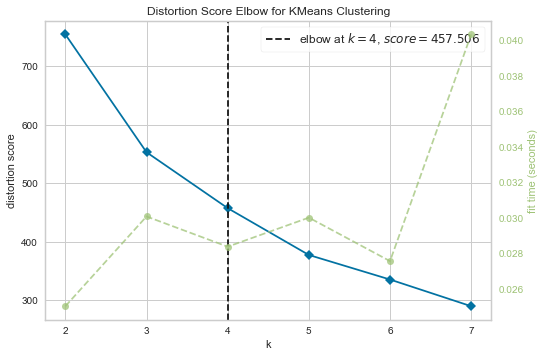

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [37]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [38]:
colormap = plt.cm.viridis

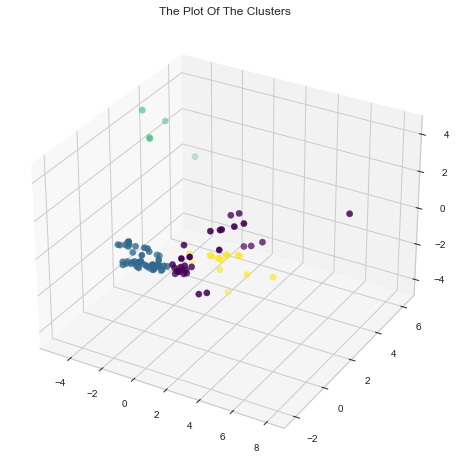

In [39]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap=colormap)
ax.set_title("The Plot Of The Clusters")
plt.show()

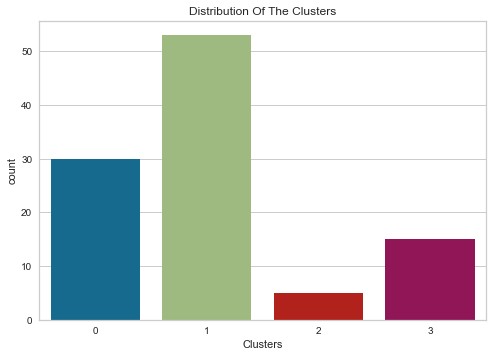

In [40]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

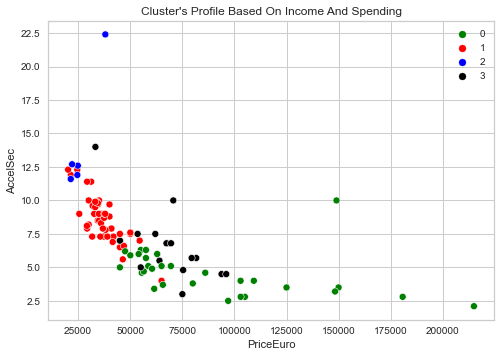

In [41]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["AccelSec"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

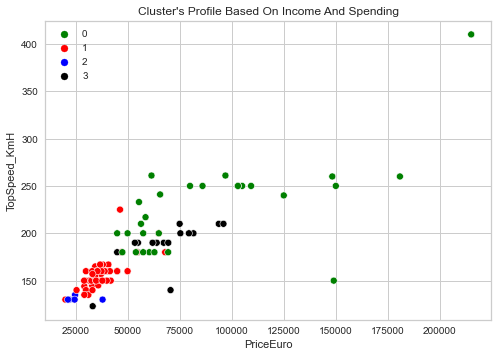

In [42]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["TopSpeed_KmH"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

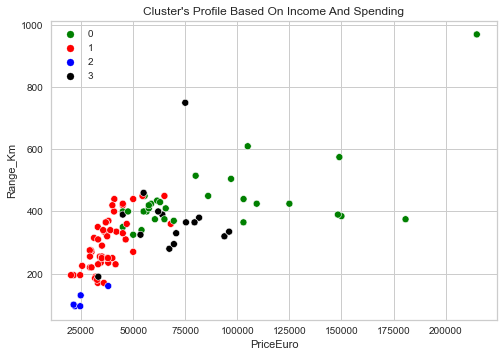

In [43]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["Range_Km"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

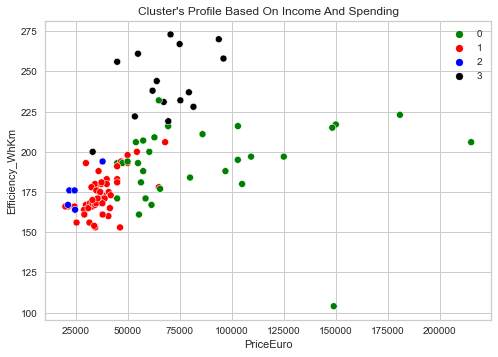

In [44]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["Efficiency_WhKm"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

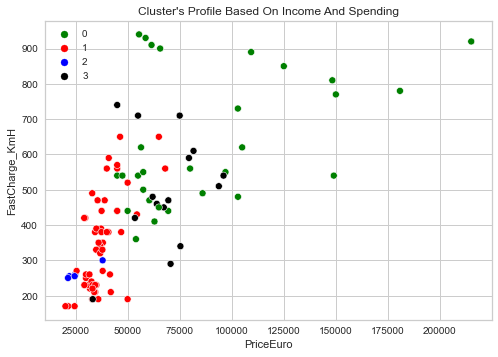

In [45]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["FastCharge_KmH"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

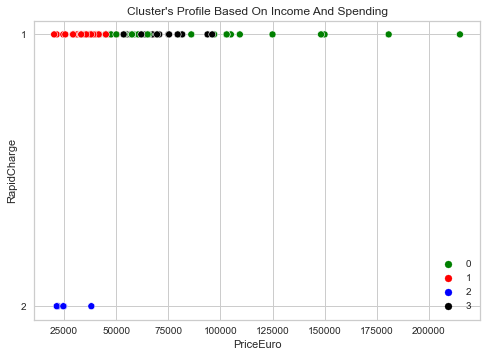

In [46]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["RapidCharge"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

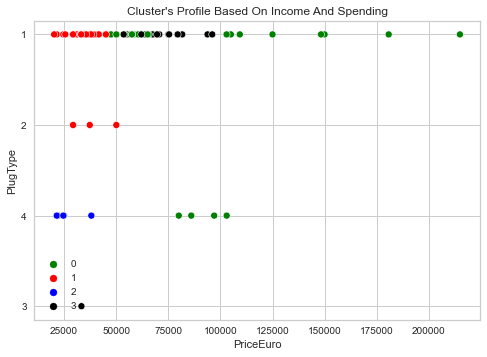

In [47]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["PlugType"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

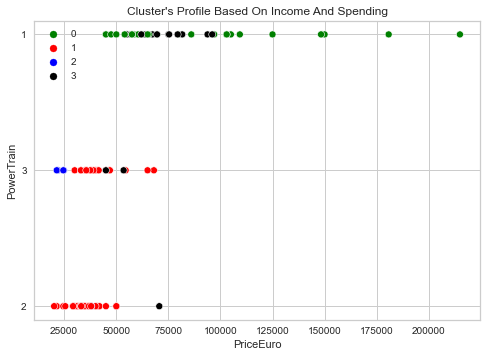

In [48]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df["PowerTrain"],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

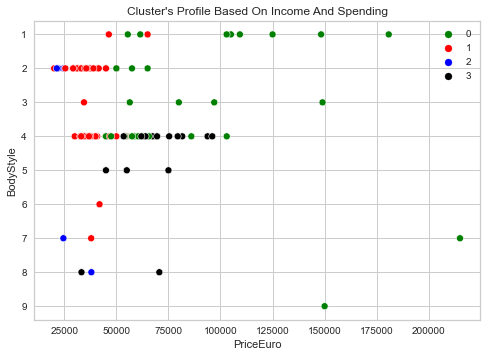

In [49]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df['BodyStyle'],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

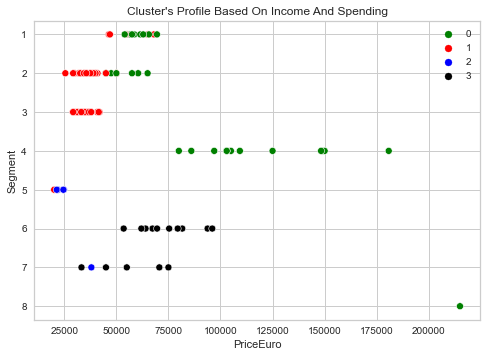

In [50]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df['Segment'],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

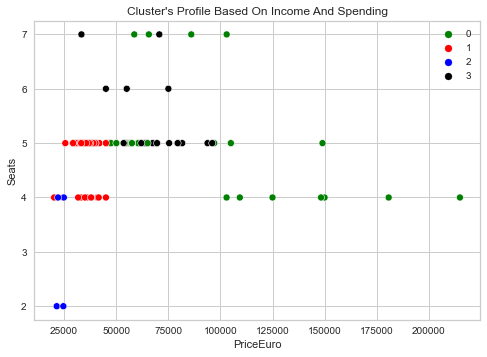

In [51]:
pl = sns.scatterplot(data = df,x=df["PriceEuro"], y=df['Seats'],hue=df["Clusters"], palette= ['green','red','blue','black'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(PCA_ds)

DBSCAN()

In [53]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_ds)
distances, indices = nbrs.kneighbors(PCA_ds)

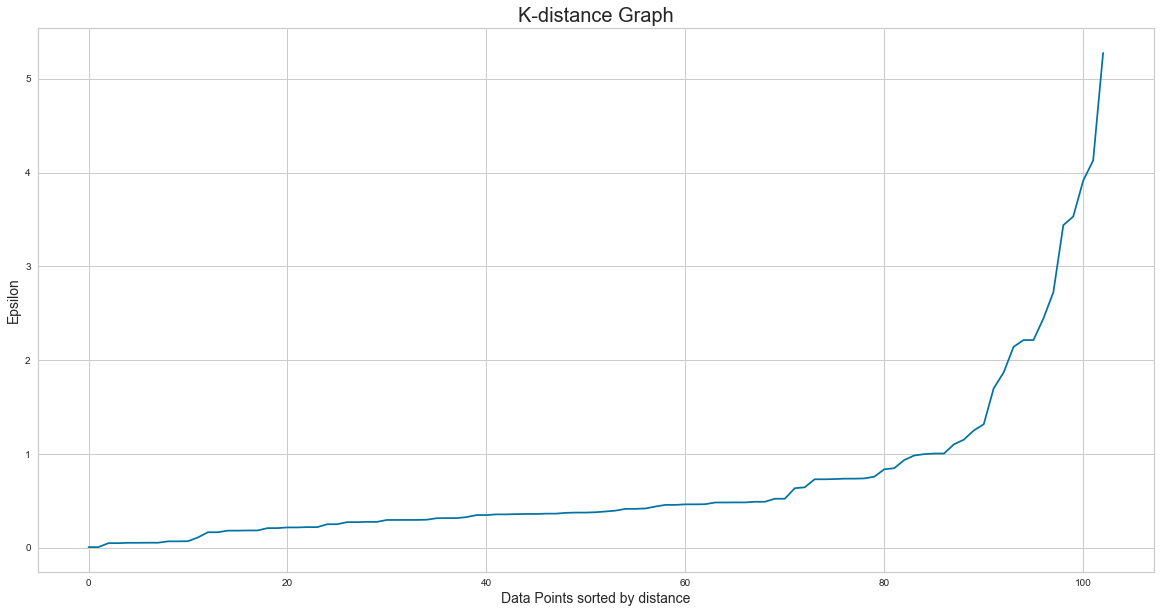

In [54]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [55]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1.5,min_samples=6)
dbscan_opt.fit(PCA_ds)

DBSCAN(eps=1.5, min_samples=6)

In [56]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    51
-1    24
 1    13
 3     9
 2     6
Name: DBSCAN_opt_labels, dtype: int64

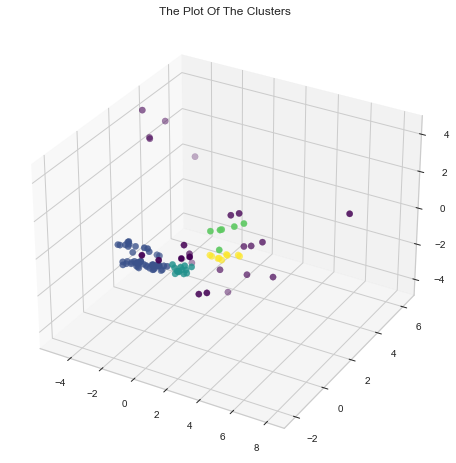

In [57]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df['DBSCAN_opt_labels'], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

In [58]:
print(set(df['DBSCAN_opt_labels']))

{0, 1, 2, 3, -1}


In [59]:
n_clusters=len(dbscan_opt.labels_)
print(metrics.silhouette_score(PCA_ds,dbscan_opt.labels_))

0.27947213982965907
